In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics

In [2]:
train_data= pd.read_csv("D:/arg_assignments/Project_ml/Train.csv", nrows=1000000)

In [3]:
train_data

,Id,Title,Body,Tags
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents
5,6,setting proxy in active directory environment,<p>I am using a machine on which active direct...,proxy active-directory jmeter
6,7,How to draw barplot in this way with Coreplot,<p>My image is cannot post so the link is my ...,core-plot
7,8,How to fetch an XML feed using asp.net,<p>I've decided to convert a Windows Phone 7 a...,c# asp.net windows-phone-7
8,9,.NET library for generating javascript?,<p>Do you know of a .NET library for generatin...,.net javascript code-generation
9,10,"SQL Server : procedure call, inline concatenat...",<p>I'm using SQL Server 2008 R2 and was wonder...,sql variables parameters procedure calls


In [4]:
train_data.drop(columns=["Id"],axis=1,inplace=True)

In [5]:
train_data

,Title,Body,Tags
0,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...
1,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox
2,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning
3,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding
4,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents
5,setting proxy in active directory environment,<p>I am using a machine on which active direct...,proxy active-directory jmeter
6,How to draw barplot in this way with Coreplot,<p>My image is cannot post so the link is my ...,core-plot
7,How to fetch an XML feed using asp.net,<p>I've decided to convert a Windows Phone 7 a...,c# asp.net windows-phone-7
8,.NET library for generating javascript?,<p>Do you know of a .NET library for generatin...,.net javascript code-generation
9,"SQL Server : procedure call, inline concatenat...",<p>I'm using SQL Server 2008 R2 and was wonder...,sql variables parameters procedure calls


In [6]:
print(train_data.isnull().sum())

Title    0
Body     0
Tags     1
dtype: int64


In [7]:
train_data.dropna(inplace=True)

In [8]:
print(train_data.isnull().sum())

Title    0
Body     0
Tags     0
dtype: int64


In [9]:
train_data["Count_tags"]=train_data.Tags.apply(lambda x:len(str(x).split()))

In [10]:
train_data

,Title,Body,Tags,Count_tags
0,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...,5
1,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox,1
2,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning,3
3,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding,3
4,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents,3
5,setting proxy in active directory environment,<p>I am using a machine on which active direct...,proxy active-directory jmeter,3
6,How to draw barplot in this way with Coreplot,<p>My image is cannot post so the link is my ...,core-plot,1
7,How to fetch an XML feed using asp.net,<p>I've decided to convert a Windows Phone 7 a...,c# asp.net windows-phone-7,3
8,.NET library for generating javascript?,<p>Do you know of a .NET library for generatin...,.net javascript code-generation,3
9,"SQL Server : procedure call, inline concatenat...",<p>I'm using SQL Server 2008 R2 and was wonder...,sql variables parameters procedure calls,5


Text(0, 0.5, 'Number of Quries')

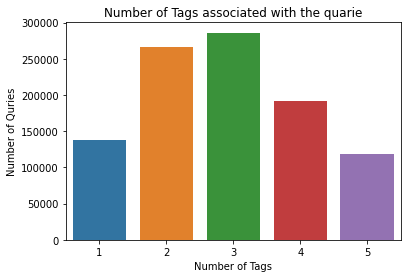

In [10]:
sns.countplot(train_data.Count_tags)
plt.title("Number of Tags associated with the quarie")
plt.xlabel("Number of Tags")
plt.ylabel("Number of Quries")

In [11]:
tags_vector=CountVectorizer(tokenizer = lambda x: x.split(),binary=True)
x_tags=tags_vector.fit_transform(train_data.Tags)
count=x_tags.sum(axis=0)
freq_tags=pd.DataFrame()
freq_tags["tags"]=tags_vector.get_feature_names()
freq_tags["count"]=count.tolist()[0]
freq_tags.sort_values(by='count',ascending=False,inplace=True)
freq_tags.reset_index(inplace=True)
freq_tags.drop(columns="index",inplace=True)
print(freq_tags)

                          tags  count
0                           c#  76937
1                         java  68293
2                          php  64885
3                   javascript  60820
4                      android  53227
5                       jquery  50680
6                          c++  33281
7                       python  30724
8                       iphone  30205
9                      asp.net  29355
10                       mysql  28501
11                        html  27237
12                        .net  27013
13                         ios  22511
14                 objective-c  22161
15                         sql  22070
16                         css  21449
17                       linux  21205
18               ruby-on-rails  19595
19                     windows  16254
20                           c  15842
21                  sql-server  12611
22                        ruby  12040
23                         wpf  10807
24                         xml  10626
25          

In [12]:
print("----------------------The Top 10 Tags in the Corpus ---------------")
print(freq_tags["tags"][:10].values)
print("--------------------Top 10 Least Frequent tags in the Corpus--------------")
print(freq_tags.tail(10)["tags"].values)

----------------------The Top 10 Tags in the Corpus ---------------
['c#' 'java' 'php' 'javascript' 'android' 'jquery' 'c++' 'python' 'iphone'
 'asp.net']
--------------------Top 10 Least Frequent tags in the Corpus--------------
['ends-with' 'endusers' 'thinkcentre' 'energy-efficiency' 'energysmart'
 'enet' 'engopen' 'enhanced-for-loop' 'enhanced-rich-text'
 'string-algorithm']


Text(0.5, 1.0, 'Occurence of Tags in corpus')

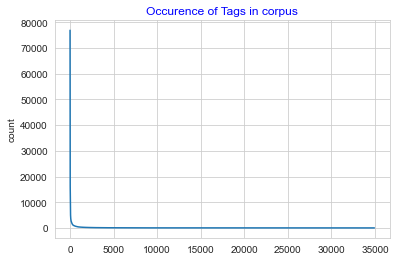

In [13]:
sns.set_style("whitegrid")
sns.lineplot(data=freq_tags,x=freq_tags.index,y="count")
plt.title("Occurence of Tags in corpus",color="blue")

Text(0.5, 1.0, 'Occurence of Tags in corpus')

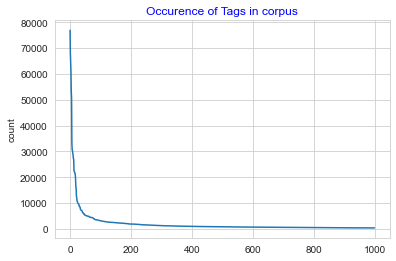

In [14]:
sns.set_style("whitegrid")
sns.lineplot(data=freq_tags.iloc[:1000],x=freq_tags.index[:1000],y="count")
plt.title("Occurence of Tags in corpus",color="blue")

Text(0.5, 1.0, 'Occurence of Tags in corpus')

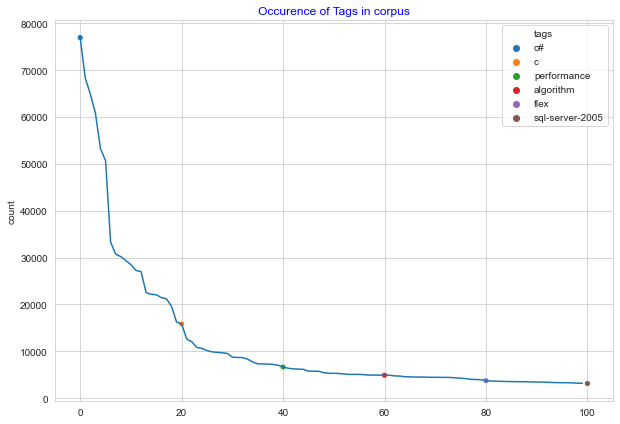

In [15]:
plt.figure(figsize=(10,7))
sns.set_style("whitegrid")
sns.lineplot(data=freq_tags.iloc[:100],x=freq_tags.index[:100],y="count")
a=[0,20,40,60,80,100]
sns.scatterplot(a,freq_tags.iloc[a,1],hue=freq_tags.iloc[a,0])
plt.title("Occurence of Tags in corpus",color="blue")

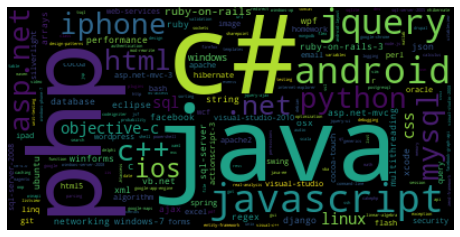

In [16]:
t=freq_tags.tags.to_list()
c=freq_tags["count"].to_list()
tags_dic={}
for i,j in zip(t,c):
    tags_dic[i]=j
#print(tags_dic)
wordcloud = WordCloud().generate_from_frequencies(tags_dic)
plt.figure(figsize=(8,8))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
## Data preprocessing
#part-1 Defining Meta Feature before Preprocessing(Experimental)
#Number of Characters in Title
#Number of Character in Body column
#Number of Code Segemts in each row
#Number of Words in Title
char_title_pre=train_data.Title.apply(lambda x:len(x))
char_body_pre=train_data.Body.apply(lambda x:len(x))
code_body_pre=train_data.Body.apply(lambda x:len(re.findall(r"<code>",x)))
words_title_pre=train_data.Title.apply(lambda x:len(str(x).split()))

In [18]:
# Defining Some Extra StopWords seems to be Not useful
extra=['could',"would","iis","sometimes","sometime","puts","put","get","gets","help","please","need",\
       "like","know","thank","thanks","madam","sir","hii","doubt","doubts","www","com"]
li=stopwords.words("english")
li=li+extra

In [19]:
## Preprocessing
##  Removing html tags,urls
##  Removing the code segemts (assumes codes are varies much)
#   Removing the Punctuations and Numbers and Keeping only text

def Preprocesser(doc):
    body=[]
    for text in doc:
        text=re.sub(r"href.*","",text)          #removing the href ie. removing the hyper links
        text=re.sub('<code>(.*?)</code>', '', text, flags=re.MULTILINE|re.DOTALL) # removing the code segments
        text=re.sub('<.*?>', ' ', str(text.encode('utf-8')))           #removing the Html Tags in the Text
        text=re.sub(r"[^a-zA-Z]+"," ",text)  ## removing numbers and most of Puncutuations in the Text.
        text=text.lower()                    ## converting from upper case to lower case
        body.append(" ".join([k for k in text.split() if((len(k)>2 or k=="c") and k not in li )]))
        
    return body

In [20]:
pre_body=Preprocesser(train_data.Body)      ## Preprocessing the Body Columns

In [21]:
pre_text=Preprocesser(train_data.Title)     ## Preprocessing the Title Columns

In [22]:
## Replacing the a Title and Body with the Preprocessed Title and Body respectively.
train_data["Title"]=pre_text
train_data["Body"]=pre_body
pre_data=train_data    # Creating a Reference for the train_data_100k 

In [23]:
pre_data

,Title,Body,Tags,Count_tags
0,check uploaded file image without mime type,check uploaded file image file png jpg jpeg gi...,php image-processing file-upload upload mime-t...,5
1,prevent firefox closing press ctrl,favorite editor vim regularly use ctrl execute...,firefox,1
2,error invalid type list variable,import matlab file construct data frame matlab...,r matlab machine-learning,3
3,replace special characters url,probably simple simply cannot find answer basi...,c# url encoding,3
4,modify whois contact details,using modify function displays warning mesage ...,php api file-get-contents,3
5,setting proxy active directory environment,using machine active directory configured deve...,proxy active-directory jmeter,3
6,draw barplot way coreplot,image cannot post link picture want draw chart...,core-plot,1
7,fetch xml feed using asp net,decided convert windows phone app fetches xml ...,c# asp.net windows-phone-7,3
8,net library generating javascript,net library generating javascript code want ge...,.net javascript code-generation,3
9,sql server procedure call inline concatenation...,using sql server wondering another way writing...,sql variables parameters procedure calls,5


In [25]:
## part 2: Defining Meta Features After Preprocessing the Dataset
##    Number of words in the Title
##    Number of Words in the Body
words_title_post=train_data.Title.apply(lambda x:len(str(x).split()))
words_body_post=train_data.Body.apply(lambda x:len(str(x).split()))

In [26]:
##  Adding to the Dataset
##   Adding the meta Feautures to the train dataset and normalize the Features.


In [27]:
train_data["char_title_pre"]=(char_title_pre-min(char_title_pre))/(max(char_title_pre)-min(char_title_pre))
train_data["char_body_pre"]=(char_body_pre-min(char_body_pre))/(max(char_body_pre)-min(char_body_pre))
train_data["code_body_pre"]=(code_body_pre-min(code_body_pre))/(max(code_body_pre)-min(code_body_pre))
train_data["words_title_pre"]=(words_title_pre-min(words_title_pre))/(max(words_title_pre)-min(words_title_pre))
train_data["words_title_post"]=(words_title_post-min(words_title_post))/(max(words_title_post)-min(words_title_post))
train_data["words_body_post"]=(words_body_post-min(words_body_post))/(max(words_body_post)-min(words_body_post))

In [28]:
train_data.head()

,Title,Body,Tags,Count_tags,char_title_pre,char_body_pre,code_body_pre,words_title_pre,words_title_post,words_body_post
0,check uploaded file image without mime type,check uploaded file image file png jpg jpeg gi...,php image-processing file-upload upload mime-t...,5,0.267677,0.009741,0.000000,0.324324,0.134615,0.013399
1,prevent firefox closing press ctrl,favorite editor vim regularly use ctrl execute...,firefox,1,0.242424,0.008543,0.000000,0.270270,0.096154,0.011111
2,error invalid type list variable,import matlab file construct data frame matlab...,r matlab machine-learning,3,0.151515,0.337555,0.012346,0.162162,0.096154,0.011765
3,replace special characters url,probably simple simply cannot find answer basi...,c# url encoding,3,0.176768,0.013588,0.000000,0.216216,0.076923,0.010458
4,modify whois contact details,using modify function displays warning mesage ...,php api file-get-contents,3,0.131313,0.024279,0.006173,0.135135,0.076923,0.002941


In [29]:
## seperate the tag columns and the droping the Tags column from the dataset
y_tagss=train_data.Tags
train_data.drop(columns="Tags",axis=1,inplace=True)

In [30]:
pre_data=train_data
pre_data

,Title,Body,Count_tags,char_title_pre,char_body_pre,code_body_pre,words_title_pre,words_title_post,words_body_post
0,check uploaded file image without mime type,check uploaded file image file png jpg jpeg gi...,5,0.267677,0.009741,0.000000,0.324324,0.134615,0.013399
1,prevent firefox closing press ctrl,favorite editor vim regularly use ctrl execute...,1,0.242424,0.008543,0.000000,0.270270,0.096154,0.011111
2,error invalid type list variable,import matlab file construct data frame matlab...,3,0.151515,0.337555,0.012346,0.162162,0.096154,0.011765
3,replace special characters url,probably simple simply cannot find answer basi...,3,0.176768,0.013588,0.000000,0.216216,0.076923,0.010458
4,modify whois contact details,using modify function displays warning mesage ...,3,0.131313,0.024279,0.006173,0.135135,0.076923,0.002941
5,setting proxy active directory environment,using machine active directory configured deve...,3,0.176768,0.009167,0.000000,0.135135,0.096154,0.010131
6,draw barplot way coreplot,image cannot post link picture want draw chart...,1,0.176768,0.013963,0.000000,0.216216,0.076923,0.008497
7,fetch xml feed using asp net,decided convert windows phone app fetches xml ...,3,0.141414,0.021381,0.003086,0.189189,0.115385,0.018954
8,net library generating javascript,net library generating javascript code want ge...,3,0.146465,0.013613,0.000000,0.108108,0.076923,0.012745
9,sql server procedure call inline concatenation...,using sql server wondering another way writing...,5,0.257576,0.010016,0.006173,0.189189,0.134615,0.005882


In [ ]:
# Converting the Tags columns in to the Mulit label Classification
# initializing the Count vectorizer
tag_vect=CountVectorizer(binary=True,tokenizer=lambda x:str(x).split(),max_features=500)
vec_tag=tag_vect.fit_transform(y_tagss)

In [38]:
## split the Training dataset and validataion dataset
x_train,x_val,y_train,y_val=train_test_split(pre_data.iloc[:500000,],vec_tag[:500000],test_size=0.2)
print("The shape of the Training Dataset :",x_train.shape,y_train.shape)
print("The shape of the validation Dataset :",x_val.shape,y_val.shape)

The shape of the Training Dataset : (400000, 9) (400000, 500)
The shape of the validation Dataset : (100000, 9) (100000, 500)


In [39]:
###############################################################################################
###                     Model Building       ###


In [40]:
## Concatenating Title And Body to a Single Feature
tit_bod_train=[i+" "+j for i,j in zip(x_train.Title,x_train.Body)] ## combining the both the title and Body
tit_bod_val=[i+" "+j for i,j in zip(x_val.Title,x_val.Body)]  # combining the title and Body for the Validation

In [44]:
feat_vec=TfidfVectorizer(tokenizer=lambda x:x.split(),max_features=100000,ngram_range=(1,1))
feat_vec.fit(tit_bod_train)
train_feat=feat_vec.transform(tit_bod_train)
val_feat=feat_vec.transform(tit_bod_val)

In [48]:
# Concatenate the Title_Body and Derived Features 
train_feat=hstack((train_feat,x_train.iloc[:,2:].values))
val_feat=hstack((val_feat,x_val.iloc[:,2:].values))

In [50]:
print("The Shape of the Training Dataset :",train_feat.shape)
print("The Shape of the Validation Dataset :",val_feat.shape)

The Shape of the Training Dataset : (400000, 100007)
The Shape of the Validation Dataset : (100000, 100007)


In [57]:
### Using the Log Loss (Linear MOdels --> Logistic regression)

classifier = OneVsRestClassifier(SGDClassifier(penalty='l2',loss="log",alpha=0.000001), n_jobs=-1)
classifier.fit(train_feat, y_train)
val_pre = classifier.predict(val_feat)

print("accuracy :",metrics.accuracy_score(y_val,val_pre))
print("macro f1 score :",metrics.f1_score(y_val, val_pre, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_val, val_pre, average = 'micro'))

accuracy : 0.23584
macro f1 score : 0.3596251719963342
micro f1 scoore : 0.47987839662630066


In [58]:
## Hinge Loss ---> Linear SVM Classifier 
classifier = OneVsRestClassifier(SGDClassifier(penalty='l2',loss="hinge",alpha=0.000001), n_jobs=-1)
classifier.fit(train_feat, y_train)
val_pre = classifier.predict(val_feat)

##VALIDATION ACCURACY
print("accuracy :",metrics.accuracy_score(y_val,val_pre))
print("macro f1 score :",metrics.f1_score(y_val, val_pre, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_val, val_pre, average = 'micro'))

accuracy : 0.24264
macro f1 score : 0.3568651355586216
micro f1 scoore : 0.4917833315574376


In [59]:
## TRAINING ACCURACY
val_pre = classifier.predict(train_feat)

print("accuracy :",metrics.accuracy_score(y_train,val_pre))
print("macro f1 score :",metrics.f1_score(y_train, val_pre, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_train, val_pre, average = 'micro'))

accuracy : 0.3236775
macro f1 score : 0.4694252388339727
micro f1 scoore : 0.5943957953666158


In [ ]:
## ‘modified_huber Loss’---> Problastic Models 
classifier = OneVsRestClassifier(SGDClassifier(penalty='l2',loss='modified_huber',alpha=0.0000001), n_jobs=-1)
classifier.fit(train_feat, y_train)
val_pre = classifier.predict(val_feat)

print("accuracy :",metrics.accuracy_score(y_val,val_pre))
print("macro f1 score :",metrics.f1_score(y_val, val_pre, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_val, val_pre, average = 'micro'))